# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import string
import cv2
import mahotas as mt
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
dataset = pd.read_csv("Flavia_extracted.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,98.957550,102.770935,100.843491,35.652098,26.792959,32.189963,190.537001,0.892301,0.134004,12.077638
1,0,100.871948,116.735458,102.019089,41.283659,28.166576,42.529561,235.772070,0.891848,0.154905,12.348248
2,0,107.383133,102.535477,96.379501,67.895904,59.857803,64.046854,789.043507,0.899377,0.118970,13.388292
3,0,148.033737,147.388245,146.338852,57.348176,53.849861,60.370425,892.442344,0.854476,0.092376,13.722825
4,0,117.126266,136.943909,144.456406,38.584152,39.337950,47.102819,210.323634,0.931679,0.186772,12.240627


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
ds_path = "data_disease"
img_files = os.listdir(ds_path)

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

In [7]:
breakpoints = [1001,1101,1102,1201,1202,1301,1302,1401]

In [8]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [9]:
y = np.array(target_list)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [60]:
X = dataset.iloc[:,1:]

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,98.957550,102.770935,100.843491,35.652098,26.792959,32.189963,190.537001,0.892301,0.134004,12.077638
1,100.871948,116.735458,102.019089,41.283659,28.166576,42.529561,235.772070,0.891848,0.154905,12.348248
2,107.383133,102.535477,96.379501,67.895904,59.857803,64.046854,789.043507,0.899377,0.118970,13.388292
3,148.033737,147.388245,146.338852,57.348176,53.849861,60.370425,892.442344,0.854476,0.092376,13.722825
4,117.126266,136.943909,144.456406,38.584152,39.337950,47.102819,210.323634,0.931679,0.186772,12.240627
...,...,...,...,...,...,...,...,...,...,...
395,109.723892,115.628220,98.841034,64.893072,56.395522,62.994182,920.616281,0.865720,0.160434,12.957898
396,130.362488,138.110886,119.024750,45.222651,31.907109,47.379748,440.447355,0.839933,0.127242,12.882706
397,106.491547,118.409897,95.565796,48.388733,38.710433,49.280728,1477.869985,0.564449,0.039863,14.163584
398,104.000443,119.920334,93.417084,60.029261,58.840633,57.345795,886.062854,0.866765,0.179786,12.503882


In [21]:
X.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,98.957550,102.770935,100.843491,35.652098,26.792959,32.189963,190.537001,0.892301,0.134004,12.077638
1,100.871948,116.735458,102.019089,41.283659,28.166576,42.529561,235.772070,0.891848,0.154905,12.348248
2,107.383133,102.535477,96.379501,67.895904,59.857803,64.046854,789.043507,0.899377,0.118970,13.388292
3,148.033737,147.388245,146.338852,57.348176,53.849861,60.370425,892.442344,0.854476,0.092376,13.722825
4,117.126266,136.943909,144.456406,38.584152,39.337950,47.102819,210.323634,0.931679,0.186772,12.240627


In [59]:
y[99:104]

array([0, 0, 1, 1, 1])

### Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 142)

In [63]:
X_train.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
249,132.770630,143.912476,125.190125,45.290935,42.593995,54.430837,633.223776,0.835548,0.122929,13.053379
213,136.580383,139.521927,116.608994,44.574944,43.113121,52.116184,813.494592,0.789305,0.099014,13.456331
202,128.752777,125.262512,98.967361,49.953809,48.686112,58.990671,689.783477,0.857151,0.110150,13.438864
291,113.914185,121.170822,102.853439,47.961270,44.776286,55.772973,1036.092854,0.756206,0.077018,13.906162
144,110.707153,125.656998,102.082260,52.217729,48.431953,60.917884,196.003530,0.958331,0.231751,11.901738


In [64]:
y_train[0:100]

array([2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 3, 0, 3, 2, 1, 0, 2, 1, 0, 1,
       3, 3, 0, 0, 3, 1, 1, 3, 1, 0, 3, 0, 1, 3, 3, 2, 0, 1, 2, 3, 1, 3,
       1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 3, 2, 3, 2, 2, 0, 0,
       3, 1, 1, 2, 2, 1, 1, 3, 1, 3, 3, 1, 0, 0, 3, 2, 0, 2, 1, 1, 0, 2,
       1, 3, 2, 1, 2, 0, 1, 3, 0, 2, 0, 3])

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [67]:
X_train[0:5]

array([[ 0.84939616,  1.15920574,  1.00021156, -0.35761289, -0.10553705,
        -0.02600177, -0.12666003, -0.00177694, -0.14909558,  0.10048315],
       [ 1.02327995,  0.93187921,  0.51300586, -0.42757428, -0.06264655,
        -0.27442691,  0.33506772, -0.52522654, -0.51313174,  0.55182047],
       [ 0.66601435,  0.19357894, -0.48862245,  0.09800899,  0.39779684,
         0.46339249,  0.01820636,  0.242758  , -0.34362199,  0.5322562 ],
       [-0.01124491, -0.01827378, -0.26798495, -0.09668731,  0.07476497,
         0.11804596,  0.90520879, -0.89989057, -0.84795519,  1.05566586],
       [-0.15761941,  0.21400396, -0.31176972,  0.3192226 ,  0.37679809,
         0.67023485, -1.24651253,  1.38806361,  1.50738878, -1.18944368]])

In [68]:
y_train[0:5]

array([2, 2, 2, 2, 1])

### Applying SVM classifier model

In [69]:
from sklearn import svm

In [70]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [71]:
y_pred = clf.predict(X_test)

In [72]:
from sklearn import metrics

In [73]:
metrics.accuracy_score(y_test, y_pred)

0.9375

In [74]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       1.00      0.95      0.98        21
           2       0.81      0.94      0.87        18
           3       1.00      0.95      0.97        19

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



### Performing parameter tuning of the model

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [77]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [78]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [79]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.256 (+/-0.015) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.503 (+/-0.061) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.759 (+/-0.139) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.887 (+/-0.082) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.884 (+/-0.070) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.869 (+/-0.100) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.509 (+/-0.054) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753 (+/-0.162) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.931 (+/-0.064) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.944 (+/-0.078) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.928 (+/-0.085) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.897 (+/-0.073) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.170) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.919 (+/-0.080) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.947 (+/-0.078) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.931 (+/-0.067) for {'C': 100, 'gamma': 0.1, 'kernel':

In [80]:
y_pred_svm = svm_clf.predict(X_test)

In [81]:
metrics.accuracy_score(y_test, y_pred_svm)

0.95

In [82]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.95      0.95      0.95        21
           2       0.95      1.00      0.97        18
           3       0.95      0.95      0.95        19

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



### Dimensionality Reduction using PCA

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA()

In [85]:
pca.fit(X)

PCA()

In [86]:
var= pca.explained_variance_ratio_
var

array([9.91526195e-01, 5.92702111e-03, 1.58455053e-03, 6.62035705e-04,
       1.31557708e-04, 1.00032867e-04, 6.71631241e-05, 1.43445310e-06,
       8.48555000e-09, 1.43196674e-09])

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

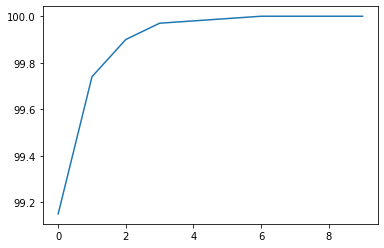

In [88]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

### Testing with our data set

In [198]:
import os
import cv2

In [303]:
def bg_sub(test_img_path):
    
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (75,75),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((85,85),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

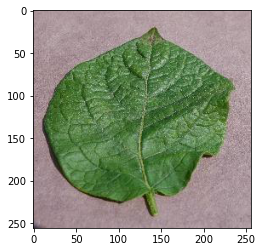

In [341]:
ds_path = 'data_disease'
test_img_path1 = ds_path + '\\test10.jpg'
main_img = cv2.imread(test_img_path1)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape
test_img_path = bg_sub(test_img_path1)


(256, 256, 3)

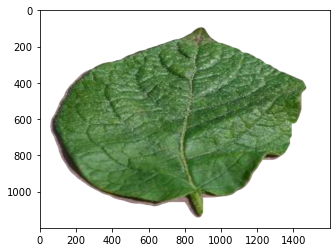

In [342]:
#main_img = cv2.imread(test_img_path)
#img = cv2.cvtColor(test_img_path, cv2.COLOR_RGB2BGR)
plt.imshow(test_img_path)
img.shape


In [343]:
import mahotas as mt

In [344]:
def feature_extract(img):
    names = ['mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

   

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [345]:
features_of_img = feature_extract(img)
features_of_img

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_7752\1232987418.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,126.585052,135.233551,110.879272,48.20138,25.584745,48.228787,431.859302,0.807976,0.110981,12.724222


In [346]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[ 0.56707561  0.70984281  0.18769294 -0.07322556 -1.51085023 -0.6916503
  -0.64241499 -0.31388364 -0.33097777 -0.26819824]]


3

In [347]:
common_names = ['Healthy Apple','Apple Scab','Early Blight - Potato','Healthy Potato']
common_names[y_pred_mobile[0]]

'Healthy Potato'